<center>
<img src="https://camo.githubusercontent.com/ad20aaaa48264581c46aa126919dbb72060ebd98cffe015523549b4974843ae5/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f46556c79616e6b696e2f725f70726f626162696c6974792f6d61737465722f656e645f73656d696e6172732f73656d5f362f73747564656e745f746561636865725f646973742e706e67" height="200"> 

# Прикладаная статистика: домашнее задание 2
</center>

> скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум

$\qquad$ [БутcРэп](https://www.youtube.com/watch?v=eE4qxB2E8d4)


**ФИО:** Куликов Дмитрий Алексеевич

## Общая информация


__Дата выдачи:__ 23.04.2022

__Дедлайн:__ 23:59MSK 14.05.2022

## Формат сдачи

Сам ноутбук называйте в формате hw-01-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет, как обычно, сдать в anytask.

## Оформление

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## [10 баллов] Задание 1 (рейтинги президентов) 

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [ ]:
df = pd.read_csv('data/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [ ]:
df_melted = pd.melt(df, 
                    id_vars=['year'],
                    value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                    var_name='Qtr', 
                    value_name='Rating').sort_values(by=['year', 'Qtr'])

In [ ]:
df_melted

,year,Qtr,Rating
0,1945,Qtr1,NaN
30,1945,Qtr2,87.0
60,1945,Qtr3,82.0
90,1945,Qtr4,75.0
1,1946,Qtr1,63.0
...,...,...,...
118,1973,Qtr4,27.0
29,1974,Qtr1,28.0
59,1974,Qtr2,25.0
89,1974,Qtr3,24.0


In [ ]:
x = pd.concat([
    df_melted.loc[(df_melted['year'] >= 1969) & (df_melted['year'] < 1972)],
    df_melted.loc[(df_melted['year'] == 1972) & (df_melted['Qtr'].isin(['Qtr1', 'Qtr2']))],
])['Rating'].dropna().to_numpy()

In [ ]:
y = pd.concat([
    df_melted.loc[(df_melted['year'] == 1972) & (df_melted['Qtr'].isin(['Qtr3', 'Qtr4']))],
    df_melted.loc[(df_melted['year'] > 1972) & (df_melted['year'] < 1974)],
    df_melted.loc[(df_melted['year'] == 1974) & (df_melted['Qtr'].isin(['Qtr1', 'Qtr2']))],
])['Rating'].dropna().to_numpy()

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

Проверка гипотезы о средних. Выборки независимые, нормально распределенны. Дисперсия не известны, но равны.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = \mu_2 \hspace{2mm} \text{Рейтинг не изменился} \\
&H_1: \hspace{2mm} \mu_1 > \mu_2  \hspace{2mm} \text{Рейтинг упал}
\end{aligned}
$$

Гипотезу проверяю на уровне значимости 5%

In [ ]:
alpha = 0.05                                          # уровень значимости = 5%
nx, ny = x.size, y.size                               # размер выборок
diff = x.mean() - y.mean()                            # разность средних

diff_var = ((nx - 1) * x.var(ddof=1) + (ny - 1) * y.var(ddof=1)) / (nx + ny - 2)
diff_std = np.sqrt(diff_var / nx + diff_var / ny)     # стандартное отклонение

t_obs = diff/diff_std                                 # наблюдаемое значение
t_crit = sts.t(df = nx + ny - 2).ppf(1 - alpha)       # критическое значение

print(f'Наблюдаемое значение {t_obs:.3} больше критического {t_crit:.3} => нулевая гипотеза отвергается')

Наблюдаемое значение 3.56 больше критического 1.73 => нулевая гипотеза отвергается


То же самое средствами `statsmodels`. 

In [ ]:
from statsmodels.stats.weightstats import ttest_ind

t_obs, p_val, _ = ttest_ind(x, y, value=0, alternative='larger')

print(f"Наблюдаемое значение: {t_obs:.3}") 
print(f"P-значение: {p_val:.3}") 

Наблюдаемое значение: 3.56
P-значение: 0.00111


In [ ]:
# небольшая самопроверка
assert np.abs(t_obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** 

В задаче говорится об использовании гипотезы о средних. Выборки независимые, нормально распредены, кол-во наблюдений небольшое, дисперсии неизвестны, но равны => используем тест Стьюдента точный.

Таким образом, после скандала средний рейтинг Никсона рухнул.
P-значение: 0.001

Снова президентом Никсон станет в $3000$ году. 

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## [10 баллов] Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [ ]:
df = pd.read_csv('data/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


В х будут лежать данные о сне без приема снотворного, в y данные о сне после приема снотворного.

In [ ]:
x = df.loc[(df['group'] == 1)]['extra'].to_numpy()

In [ ]:
y = df.loc[(df['group'] == 2)]['extra'].to_numpy()

In [ ]:
sts.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.18885164347315186, pvalue=0.8051468487462221, statistic_location=0.8, statistic_sign=1)

In [ ]:
sts.kstest(y, 'norm', args=(y.mean(), y.std(ddof=1)))

KstestResult(statistic=0.18502220757517246, pvalue=0.8237817034833373, statistic_location=1.9, statistic_sign=1)

p-значение у обеих выборок большое, не ниже нашего порога 0.05, поэтому мы не можем отвергнуть нулевую гипотезу, а значит выборки нормально распределены.

Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

In [ ]:
alpha = 0.05                          # уровень значимости = 5%

Проверка гипотезы о средних. Выборка нормально распределена. Данных немного. Считаем, что истинная дисперсия нам неизвестна. Так как мы рассматриваем только определенную группу студентов.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = 0 \hspace{2mm} \text{Сон не отличается от нормы} \\
&H_1: \hspace{2mm} \mu_1 \neq 0  \hspace{2mm} \text{Сон отличается от нормы}
\end{aligned}
$$

Используем t-критерий для среднего, точный

In [ ]:
nx = x.size                           # размер выборки
mu1 = x.mean()                        # среднее значение
std1 = x.std(ddof=1)/np.sqrt(nx)       # стандартное отклонение

t_obs1 = (mu1 - 0) / std1                # наблюдаемое значение статистики 
t_crit1 = sts.t(nx - 1).ppf(1 - alpha)   # критическое значение статистики

print(f'Наблюдаемое значение {t_obs1:.3} меньше критического {t_crit1:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.33 меньше критического 1.83 => нулевая гипотеза не отвергается


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

Проверка гипотезы о средних. Выборка нормально распределена. Данных немного. Считаем, что истинная дисперсия нам неизвестна. Так как мы рассматриваем только определенную группу студентов.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_2 = 0 \hspace{2mm} \text{Сон не отличается от нормы} \\
&H_1: \hspace{2mm} \mu_2 > 0  \hspace{2mm} \text{Сон студентов увеличился}
\end{aligned}
$$

Используем t-критерий для среднего, точный

In [ ]:
ny = y.size

mu2 = y.mean()                        # среднее значение

diff = mu1 - mu2
t_obs2 = diff / np.sqrt(diff.var(ddof=1)/ny)
t_crit2 = sts.t(df=ny - 1).cdf(1-alpha)

print(f'Наблюдаемое значение {t_obs2:.3} меньше критического {t_crit2:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение nan меньше критического 0.817 => нулевая гипотеза не отвергается


<ipython-input-142-60dd821c7b27>:6: RuntimeWarning: Degrees of freedom <= 0 for slice
  t_obs2 = diff / np.sqrt(diff.var(ddof=1)/ny)


In [ ]:
# самопроверка
assert np.abs(t_obs1 - 1.325710) < 1e-5
assert np.abs(t_obs2 - 4.062127) < 1e-5

AssertionError: ignored

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** 

## [30 баллов] Задание 3 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [3]:
df = pd.read_csv('data/df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

In [5]:
x = df[df['I'] == True]['likes'] # содержит местоимения
y = df[df['I'] == False]['likes'] # не содержит местоимения

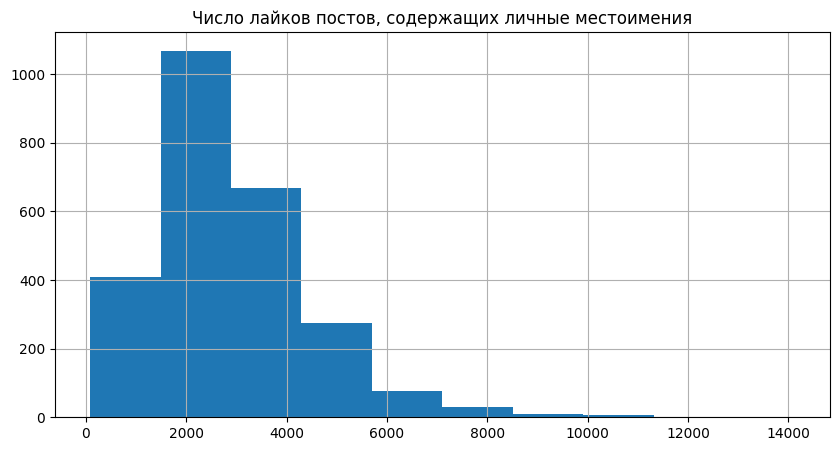

In [9]:
x.hist(figsize=(10, 5))
plt.title('Число лайков постов, содержащих личные местоимения');

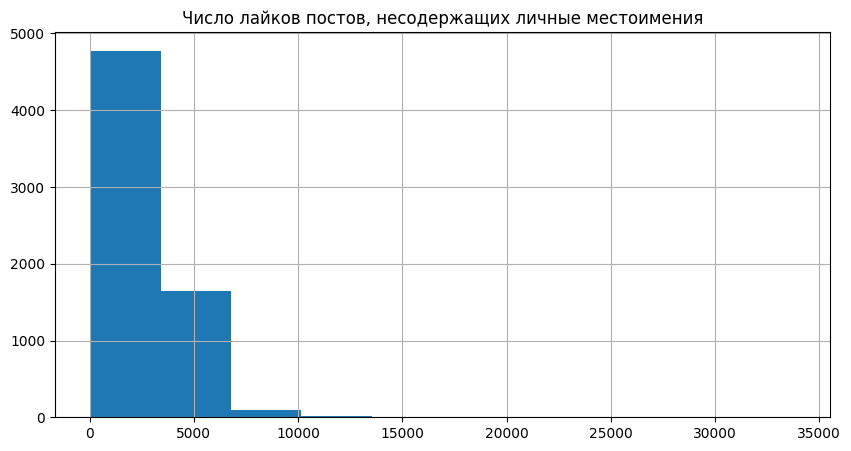

In [10]:
y.hist(figsize=(10, 5))
plt.title('Число лайков постов, несодержащих личные местоимения');

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [13]:
print(f'Для содержащих местоимения: mean = {x.mean()}, median = {x.median()}')
print(f'Для несодержащих местоимения: mean = {y.mean()}, median = {y.median()}')

Для содержащих местоимения: mean = 2879.1828885400314, median = 2588.5
Для несодержащих местоимения: mean = 2784.0432051478474, median = 2497.0


Mean и median для содержащих местоимения больше, чем для не содержащих.

Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = \mu_2 \hspace{2mm} \text{Среднее число лайков не отличается} \\
&H_1: \hspace{2mm} \mu_1 \neq \mu_2  \hspace{2mm} \text{Среднее число лайков отличается}
\end{aligned}
$$

In [15]:
alpha = 0.05                     # уровень значимости = 5%
nx, ny = x.size, y.size          # размер выборок

diff = x.mean() - y.mean()       # разность средних
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/ny)   # стандартное отклонение

z_obs = diff/diff_std            # наблюдаемое значение

In [16]:
z_obs

2.6644610922505323

Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [18]:
z_crit = sts.norm.ppf(1 - alpha)      # критическое значение
pval =  2 * (1 - sts.norm.cdf(z_obs)) # двухсторонняя

In [19]:
z_crit

1.6448536269514722

In [23]:
print(f'Наблюдаемое значение {z_obs:.4} больше критического {z_crit:.4} => нулевая гипотеза отвергается')

Наблюдаемое значение 2.664 больше критического 1.645 => нулевая гипотеза отвергается


In [20]:
pval

0.007711178605442903

*Вывод*: гипотеза о том, что среднее число лайков не отличается отвергается. 

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае использовать другой критерий. Например, критерий Манна-Уитни.

Найдите наблюдаемое значение статистики Манна-Уитни. Сравните его с критическим. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Отличается ли полученный вывод от вывода 
z-теста?

In [24]:
sts.mannwhitneyu(x, y, alternative='two-sided')

MannwhitneyuResult(statistic=8604129.5, pvalue=0.01004067464288777)

Проверьте гипотезу о мудрости с помощью бутстрапа. Нулевую гипотезу сформулируйте в терминах медиан.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

## [10 баллов] Задание 4 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

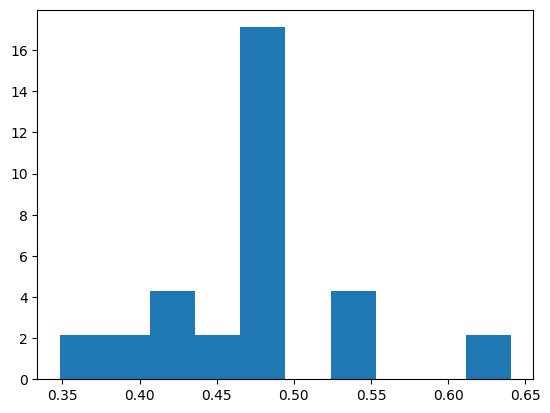

In [25]:
x = pd.read_csv('data/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение. 

Критерий знаков

$$
\begin{aligned}
&H_0: медиана доли времени, проведенного в клетке с зеркалом, равна 0.5 \\
&H_1: медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5
\end{aligned}
$$

In [29]:
from statsmodels.stats.descriptivestats import sign_test

sign_test(x, 0.5)

(-5.0, 0.021270751953125)

In [30]:
from statsmodels.stats.descriptivestats import sign_test

_, pvalue_1 = sign_test(x, 0.5)


In [31]:
pvalue_1

0.021270751953125

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение. 

In [34]:
m0 = 0.5
sts.wilcoxon(x - m0)

WilcoxonResult(statistic=35.0, pvalue=0.09344482421875)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

pvalue_2 = ... 

# your code here


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение. 

In [39]:
from statsmodels.stats.weightstats import ztest,zconfint

z_obs, pvalue_3 = ztest(x, value=0.5)

print(f"Наблюдаемое значение: {z_obs:.7}") 
print(f"P-значение: {pvalue_3:.3}") 

Наблюдаемое значение: -1.496178
P-значение: 0.135


In [38]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

NameError: ignored

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ:__

## [10 баллов] Задание 5 (ломаем тест Манна-Уитни)

Придумайте пример, на котором тест Манна-Уитни не будет работать. 

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим. 

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


<center>
<img src='https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/sem12_more_ab/mw.png' align='center' width="300x">
</center>


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


## [10 баллов] Задание 6 (проблема подглядывания)

Предположим, что мы отошли от классической схемы проведения АБ тестов и решили подводить итоги на уровне значимости 5% каждый день. Мы держим тест две недели. Если хотябы в один из дней p-value оказывается ниже $0.05,$ мы останавливаем тест и делаем выводы, что гипотеза не отвергается.

Так делать нельзя. Это называется проблемой подглядывания. В случае такой процедуры уровень значимости выходит из-под контроля. Давайте убедимся в этом с помощью симуляций. 

- Запланируйте АБ-тест для долей таким образом, чтобы ошибка 1 и 2 рода были равны 5%. В качестве MDE возьмите любое значение.
- Сгенерируйте нужное количество наблюдений. Разбейте его на 14 частей (тест идет 2 недели)
- Проверяйте гипотезу каждый день и останавливайтесь, если она не отвергается
- Какими оказались ошибки 1 и 2 рода в реальности?

Симуляции надо провести отдельно для верности нулевой гипотезы и отдельно для верности альтернативной гипотезы.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


## [20 баллов] Задание 7 (онлифанс) 

Эта задача на то, что ты выигрываешь или проигрываешь, если отказываешься от АБ-тестов и просто принимаешь решение об изенениях по среднему. Задание довольно творческое, так как способ симуляции вам предстоит придумать самостоятельно.

У Аделины и Беллы есть аккаунты на онлифанс с конверсией $p=0.2\%$. Они меняют вёрстки и смотрят, как дела с деньгами. Белла нанаяла аналитика и принимает решения об изменениях по $p-value < 0.05,$ а Аделина просто смотрит на среднее и катит по нему. Например, если на старом дизайне из тысячи посетителей только $299$ оставило копеечку, а на новом — $300$, берём новый. Если наоборот — оставляем старый.

Пусть у каждой было $100$ правочек. Правочки одинаковые для обеих девушек. На них работает один и тот же фронтендер. Будем считать, что правочки независимы друг от друга. То есть, в какой бы момент мы не выкатили правочку, у нас всегда от неё будет одинаковое воздействие на конверсию. У каждой девушки было $100$ правочек. Кто после сотни правочек вырвется вперёд по конверсии? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
